## In this code block, we will load the Titanic dataset, perform some data analysis, and generate visualizations to understand the data better.

## 1. Importing libraries

First we import all the libraries to load and visualize the data so it can be used to make predictions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## 2. Loading the data

Next, we load and display the raw data file to check what kind of data we are dealing with.

In [2]:
data = pd.read_csv(".\\Datasets\\Titanic-Dataset.csv")
data.columns = data.columns.str.lower()
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3. Plotting the data

**3.1 Survivors**

Then we will plot the amount of survivors compared to the amount of non-survivors. We also count the amount of null-values that the `survived` column contains.

We can see less than half of the passengers survived the crash.

The `survived` column does not contain any null values.

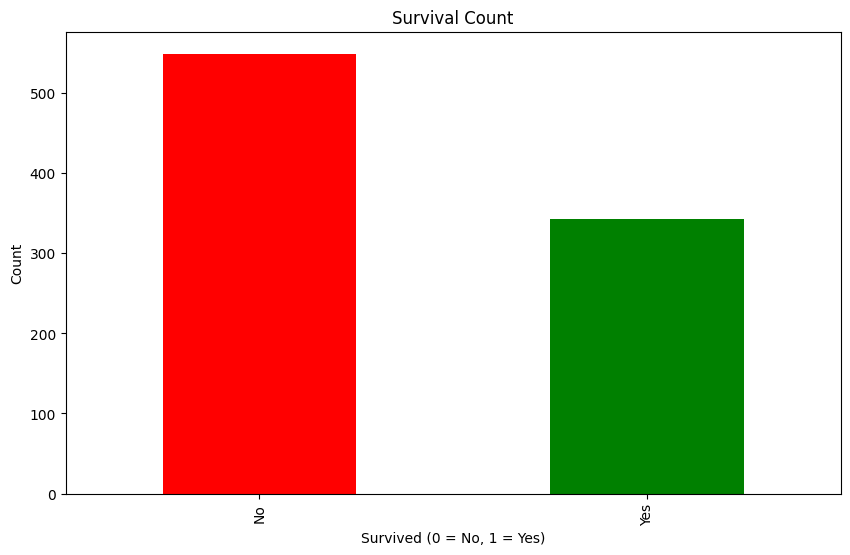

Number of null values in 'survived' column: 0


In [3]:
# Split into survivors and non-survivors
survivors = data[data['survived'] == 1]
non_survivors = data[data['survived'] == 0]

#plot survived
plt.figure(figsize=(10, 6))
data['survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Count the number of null values in the 'survived' column
null_sur_count = data['survived'].isnull().sum()
print(f"Number of null values in 'survived' column: {null_sur_count}")

**3.2 Passenger Class**

Next we will plot the amount of passengers distributed between the 3 passenger classes. We then split these 3 distributions in survivors and non-survivors. We also counted the amount of null-values that the `pclass` column contains.

Using the visualization we can see that the 3rd passenger class contains the most passengers and the highest amount of deaths. The 1st passenger class contains the most survivors and the 2nd passenger class has almost as much survivors as non-survivors.

The `pclass` column contains 0 null-values.

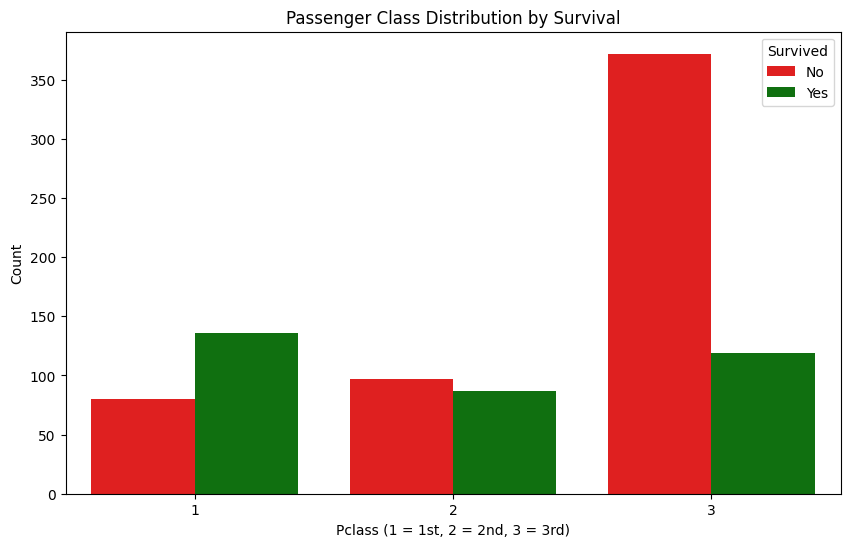

Number of null values in 'pclass' column: 0


In [4]:
# Split the data into survivors and non-survivors for passenger class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', hue='survived', data=data, palette=['red', 'green'])
plt.title('Passenger Class Distribution by Survival')
plt.xlabel('Pclass (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Count the number of null values in the 'pclass' column
null_pclass_count = data['pclass'].isnull().sum()
print(f"Number of null values in 'pclass' column: {null_pclass_count}")

**3.3 Gender**

Furthermore we plot the amount of males and females, split by survivors and non-survivors to see if people of a certain gender have a higher chance at surviving. We also counted the amount of null values in the sex column.

According to this graph, more males boarded the Titanic but were more likely to die than females during the crash.

We can also see that the `sex` class does not contain any null-values.

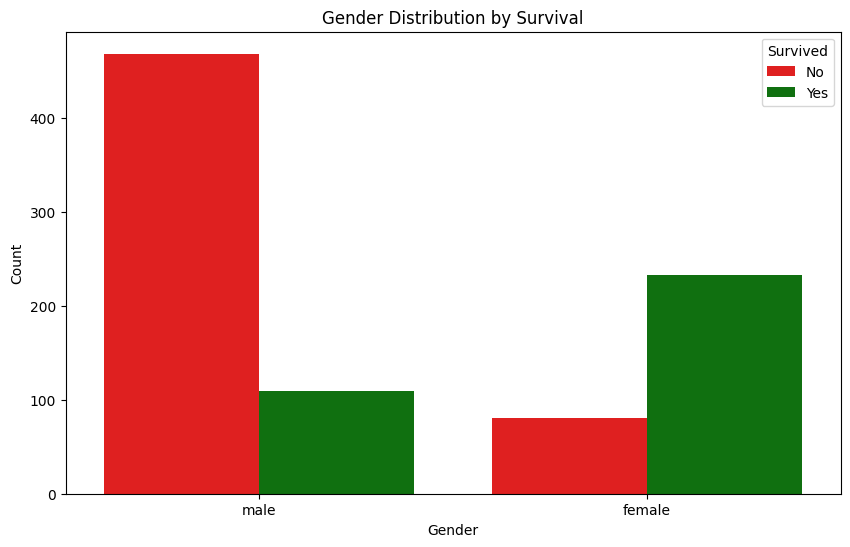

Number of null values in 'sex' column: 0


In [5]:
# Plot gender for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=data, palette=['red', 'green'])
plt.title('Gender Distribution by Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Count the number of null values in the 'gender' column
null_sex_count = data['sex'].isnull().sum()
print(f"Number of null values in 'sex' column: {null_sex_count}")


**3.4 Age**

We will also take a look at the `age` distribution of passengers which boarded the titanic. This distribution is also split in survivors and non-survivors.

From this plot we can see that most op the people that boarded the Titanic were between the age of 20 to 30. We can also see that this plot is right skewed which means that there were more people between the ages of 0 to 40 on the Titanic as passengers of the age between 40 and 80.

We can also see that most of the passengers between the ages of 30 to 40 died during the crash, but they also contained the most amount of survivors. Children between the ages of 0 to 10 years had a higher chance of surviving the crash compared to the older passengers.

We can see that the `age` column contains 177 null-values.

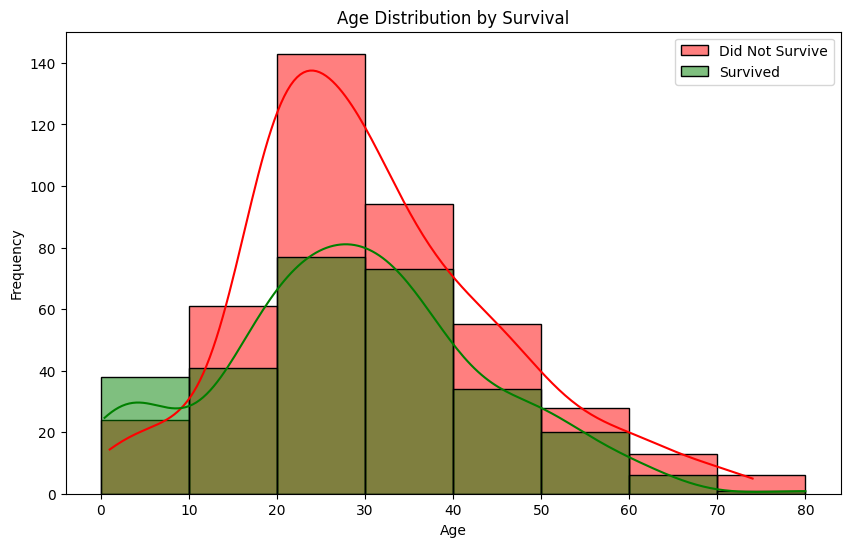

Number of null values in 'age' column: 177


In [6]:
# Plot age for survivors and non-survivors
plt.figure(figsize=(10, 6))
bins = range(0, 81, 10)
sns.histplot(data=non_survivors, x='age', bins=bins, color='red', kde=True, label='Did Not Survive', edgecolor='black')
sns.histplot(data=survivors, x='age', bins=bins, color='green', kde=True, label='Survived', edgecolor='black')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Count the number of null values in the 'age' column
null_age_count = data['age'].isnull().sum()
print(f"Number of null values in 'age' column: {null_age_count}")

**3.5 Number of Sibling/Spouses Aboard**

Next we will take a look at the amount of people who had no, 1, 2, 3 or more siblings or spouses aboard during the crash. We also count the amount of null-values the `sibsp` column contains.

We can see that most of the people who boarded the Titanic did not have any silings or spouses abourd had no siblings aboard. We can also clearly see that most of the people without any siblings or spouses aboard died during the crash. Furthermore we can see that you had a higher chance at surviving when you had a sibling or spouse aboard the titanic during the crash.

The people with 2 sibling(s) and/or spouse(s) aboard had almost a 50% chance at surviving the crash.

The `sibsp` column doesnt contain any null-values.

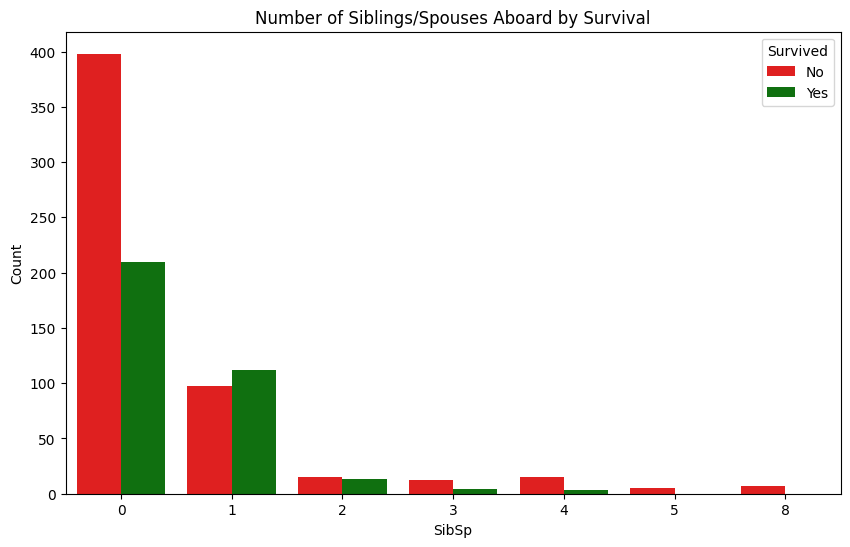

Number of null values in 'sibsp' column: 0


In [7]:
# Plot SibSp for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.countplot(x='sibsp', hue='survived', data=data, palette=['red', 'green'])
plt.title('Number of Siblings/Spouses Aboard by Survival')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()
# Count the number of null values in the 'sibsp' column
null_sibsp_count = data['sibsp'].isnull().sum()
print(f"Number of null values in 'sibsp' column: {null_sibsp_count}")

**3.6 Number of Parents/Children Aboard**

Next, we will examine the number of people who had no, 1, 2, 3, or more parents or children aboard during the crash. We also count the number of null values in the `parch` column.

The graph shows that most passengers did not have any parents or children aboard. Among those, the majority did not survive the crash. Passengers with 1 parent or child had a higher chance of survival compared to those with none.

Interestingly, passengers with 0 parents or children had a significantly lower survival rate. Passanger with a child or parant aboard were most likely to survive the crash. People with 2 child(ren) and/or parent(s) had a 50% chance at surviving the crash.

The `parch` column does not contain any null values.

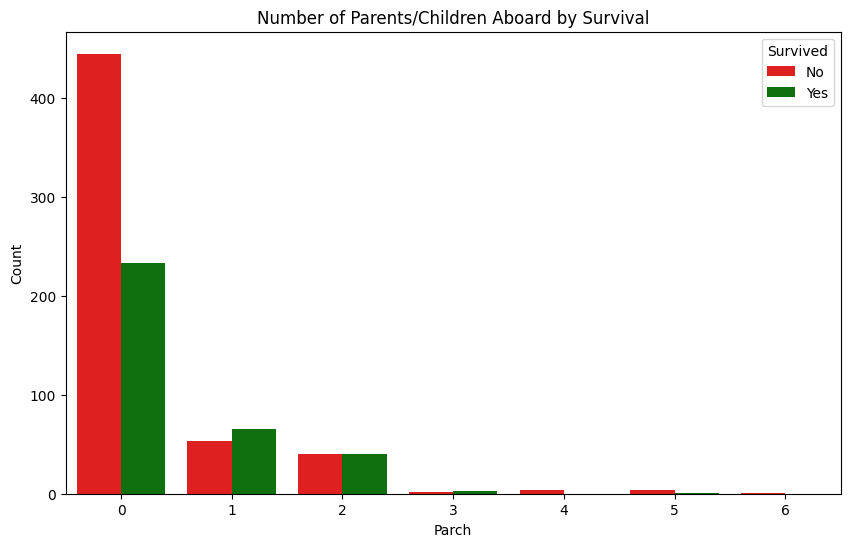

Number of null values in 'parch' column: 0


In [8]:
#plot parch for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.countplot(x='parch', hue='survived', data=data, palette=['red', 'green'])
plt.title('Number of Parents/Children Aboard by Survival')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Count the number of null values in the 'parch' column
null_parch_count = data['parch'].isnull().sum()
print(f"Number of null values in 'parch' column: {null_parch_count}")

**3.7 Fare**

Next we take a look at the distribution of people who paid a certain fare for their ticket. After that, we plot the outliers of the fare column. We also count the amount of null-values in the `fare` class.

Most op the people bought a ticket between $0 and $50. We can also see some people who bought a ticket for $500.

We can aslo see that the `fare` class has a lot of outliers ranging from prices between ~$75 and $500.

There are no null-values in the `fare` class.

In [ ]:
#plot fare
plt.figure(figsize=(10, 6))
data['fare'].plot(kind='hist', bins=31, color='cyan', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Number of People')
plt.show()

# Plot fare outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='fare', data=data, color='cyan')
plt.title('Fare Outliers')
plt.xlabel('Fare')
plt.show()

# Count the number of null values in the 'fare' column
null_fare_count = data['fare'].isnull().sum()
print(f"Number of null values in 'fare' column: {null_fare_count}")

**3.8 Port of Ebarkation**

Furthermore we take a look at the `embarked` class. We ditrbuted the passengers based on their embarkation port and split them in survivors and non-survivors. We also take a look at the amount of null-values in the `embarked` class.

According to this plot, we can see that most of the passengers boarded the titanic in Southampton, followed bu Cherbourg and lastly Queenstown.

The plot shows us that most of the survivors and non-survivors boarded the Titanic in Southampton. This plot also shows us that people who boarded the Titanic in Cherbourg had a higher survival rate, followed by Queenstown. You had the least amount of chance to suvive the crash when you boarded the Titanic in Southampton. 

The `embarked` class does not contain any null-values.

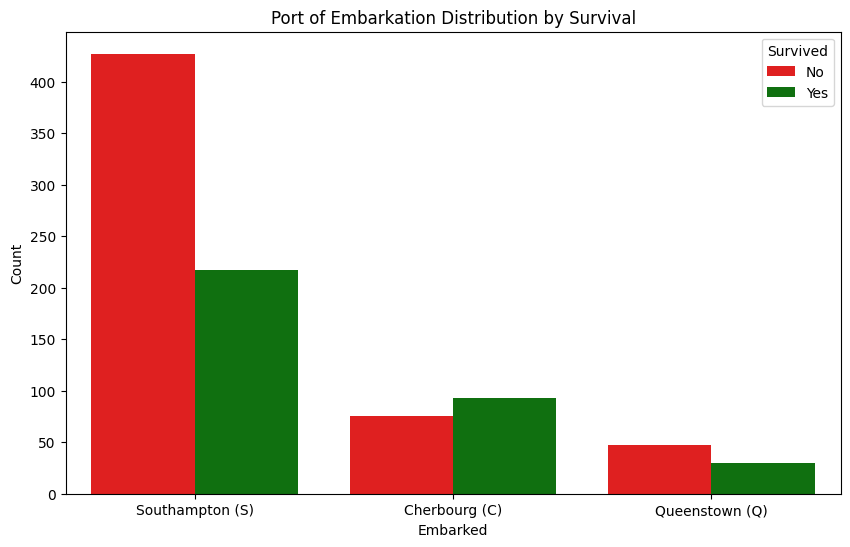

Number of null values in 'embarked' column: 2


In [ ]:
#plot embarked for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.countplot(x='embarked', hue='survived', data=data, palette=['red', 'green'])
plt.title('Port of Embarkation Distribution by Survival')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Southampton (S)', 'Cherbourg (C)', 'Queenstown (Q)'])
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Count the number of null values in the 'embarked' column
null_embarked_count = data['embarked'].isnull().sum()
print(f"Number of null values in 'embarked' column: {null_embarked_count}")